In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
COLUMNS =  ['fname', 'n', 't_opt','t','eval_opt','eval','raccept','rpa','pa_band_coef','popsize','niter','seed','y']
PARAMS = ['raccept','rpa','pa_band_coef','popsize','niter']


def init_df(n):
    columns = COLUMNS.copy()
    for i in range(n):
        columns += ['x'+str(i)]
    #print(columns)
    return pd.DataFrame(columns=columns)
def proc_line(tdf, line, fname, n):
    s = line.split('|')
    s.pop()
    s = [float(x) for x in s]
    tdf.loc[tdf.shape[0]] = [fname, n] + s    
def load_file(filename, fname, n):
    with open(filename) as f:
        data = f.readlines()
        tdf = init_df(n)
        for line in data: proc_line(tdf,line, fname, n) 
    return tdf

In [10]:
def plot_1(df, param, y='y', path="./plots/", ext='png', show=True):
    fig, axs = plt.subplots(3, 3, figsize=(15,12))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    paramdf = df[df[param]!=dflt[param].values[0]]
    dfltdf = df.loc[[0,1,2]]
    axn = -1
    for fname in ['ackley','dejong','rastrigin']:
        tdf = paramdf[paramdf['fname']==fname]
        for g in sorted(np.unique(tdf['g']), key=len):
            axn += 1
            for seed in [0,10,100]:
                axid = int(axn/3)
                axid2 = axn%3
                tdf2 = tdf[(tdf['g'] == g) & (tdf['seed']==seed)]
                dfltdf2 = dfltdf[(dfltdf['g'] == g) & (dfltdf['seed']==seed)]
                tdf2 = pd.concat([tdf2, dfltdf2]).sort_values(by=param)
                ax = axs[axid, axid2]
                xval = tdf2[param]
                yval = tdf2[y]
                ax.scatter(xval,yval)
                ax.plot(xval, yval, label = ' seed: ' + str(seed), alpha = 0.8)
                ax.title.set_text(f"{fname.capitalize()} n = {tdf2['n'].values[0]}")
                ax.legend()
                ax.set_xlabel(param)
                ax.set_ylabel(y)


                #!!!!!!!!!!!!!!SET XTICK TO PARAM VALUES
                ax.set_xticks(tdf2[param])
                
                ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

                med = yval.median()
                #ax.set_ylim([yval.min()*0.98, med*1.2])
                           
                match g:
                    case 'ackley10':
                        match param:
                            case 'raccept':
                                ax.set_ylim([-0.001,.6])
                            #case 'rpa':
                            #    ax.set_ylim([-0.001,1])
                            #case 'popsize':
                            #    ax.set_ylim([-0.001,1]) 
                    case 'ackley5':
                        match param:
                            case 'raccept':
                                ax.set_ylim([-0.001,.007])
                            #case 'rpa':
                            #    ax.set_ylim([-0.001,0.04])
                            #case 'pa_band_coef':
                            #    ax.set_ylim([-0.0001,.003])
                            case 'popsize':
                                ax.set_ylim([-0.001,.01]) 
                    case 'ackley1':
                        match param:
                            case 'raccept':
                                ax.set_ylim([-0.0001,.008])
                            #case 'rpa':
                             #   ax.set_ylim([-0.001,.025])
                            case 'popsize':
                                ax.set_ylim([-0.001,.003]) 
                    case 'dejong1':
                        match param:
                            case 'popsize':
                                ax.set_ylim([-1e-6,1e-5]) 
                            #case 'raccept':
                            #    ax.set_ylim([-1e-8,3.5e-7])
                            case 'rpa':
                                ax.set_ylim([-1e-8,1e-6]) 
                    case 'dejong5':
                        match param:
                            case 'raccept':
                                ax.set_ylim([-1e-6,1e-4]) 
                    case 'dejong10':
                        match param:
                            case 'raccept':
                                ax.set_ylim([-1e-5,1e-3]) 
                            case 'popsize':
                                ax.set_ylim([-1e-5,1e-3]) 

                    case 'rastrigin1':
                        match param:
                            case 'raccept':
                                ax.set_ylim([-1e-8,5e-7]) 
                            case 'rpa':
                                ax.set_ylim([-1e-7,2e-6]) 
                            case 'pa_band_coef':
                                ax.set_ylim([-1e-8,1e-5]) 
                            case 'popsize':
                                ax.set_ylim([-1e-7,1e-6]) 
                    case 'rastrigin5':
                        match param:
                            case 'raccept':
                                ax.set_ylim([-1e-6,1e-4]) 
                            case 'rpa':
                                ax.set_ylim([-1e-6,1e-4]) 
                            case 'pa_band_coef':
                                ax.set_ylim([-1e-7,3e-5]) 
                            #case 'popsize':
                            #    ax.set_ylim([-1e-6,7e-4]) 
                    case 'rastrigin10':
                        match param:
                            case 'raccept':
                                ax.set_ylim([-1e-5,5e-3]) 
                            #case 'rpa':
                            #    ax.set_ylim([-1e-5,3e-3]) 
                            case 'pa_band_coef':
                                ax.set_ylim([-1e-5,1e-3]) 
                            case 'popsize':
                                ax.set_ylim([-1e-6,4e-4]) 
                        
                            

                if param in ['raccept']:
                    t = ax.get_xticklabels()
                    #t = t[t!=0.97]
                    #print(t)
                    [x.set_text('') if x.get_text() == '0.97' else x for x in t]
                    ax.set_xticklabels(t)

    fig.suptitle(f"Parametr {param}", y = 0.95, fontsize=25)
    fig.savefig(path + f'{param}.{ext}', bbox_inches='tight')
    if (show):
        return fig, axs
    else: 
        return 0

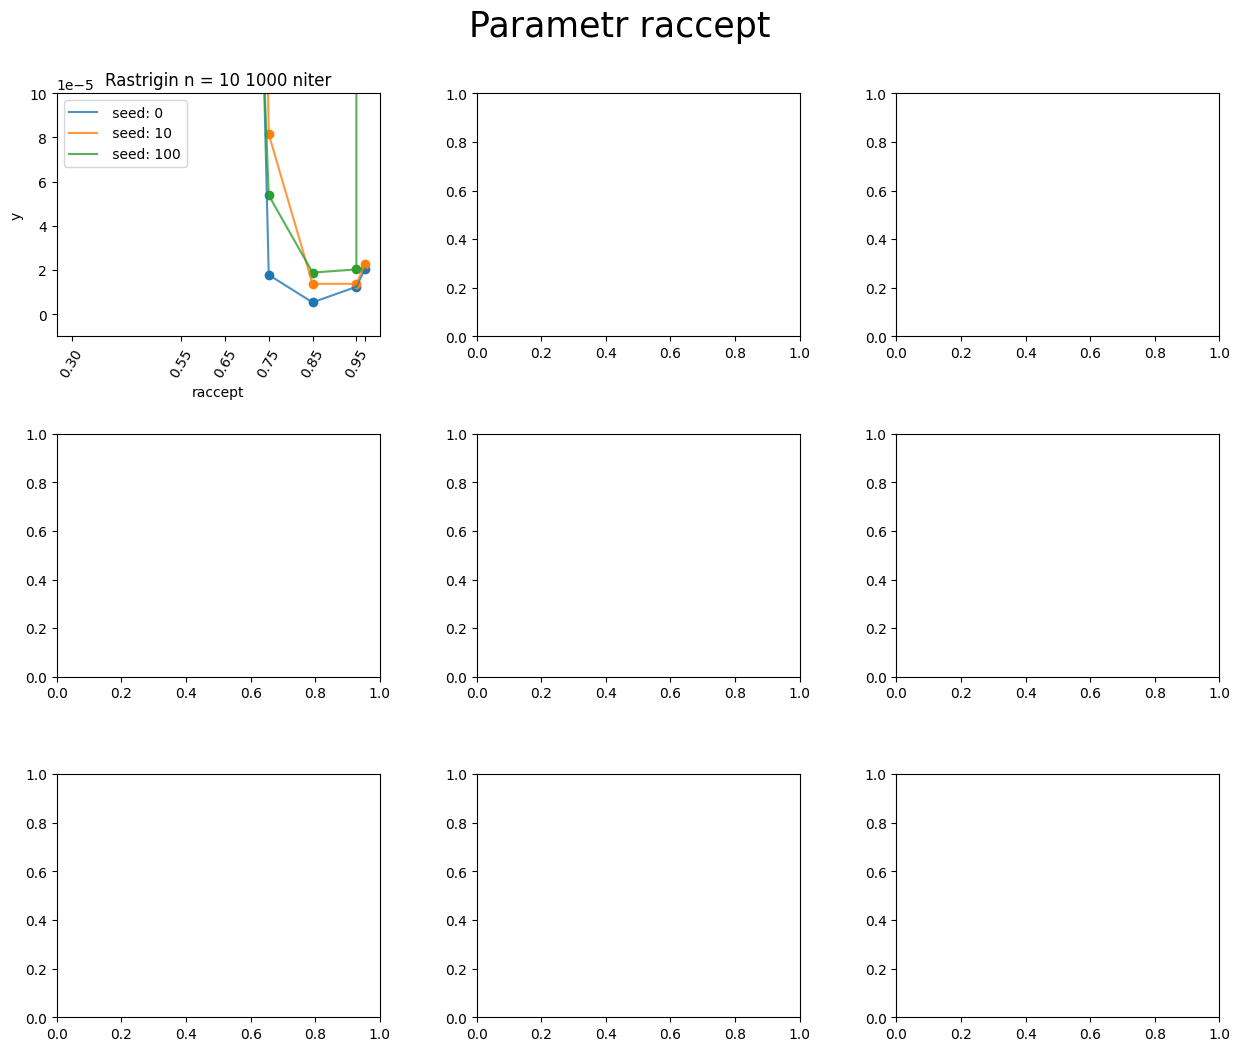

In [ ]:
filename = "./CW 11-Harmony Search/report_HS_auto.txt"
filename = "B:\\prg\\Z24\\msio\\MSWIO_24Z\\cw11\\CW 11-Harmony Search\\results\\backup\\rastrigin\\report_HS_auto_10.txt"
#filename = "B:\\prg\\Z24\\msio\\MSWIO_24Z\\cw11\\CW 11-Harmony Search\\results\\rastrigin\\report_HS_auto_10.txt"
fname = 'rastrigin'
n = 10
df = load_file(filename, fname, n)

df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
dflt = df.head(1)
for param in ['raccept']:
    fig, axs = plot_1(df,param)
axs[0][0].set_ylim([-1e-5,1e-4])
axs[0][0].set_title(axs[0][0].get_title() + " 1000 niter")
fig.savefig("./plots/rastrigin_raccept_1kiter")

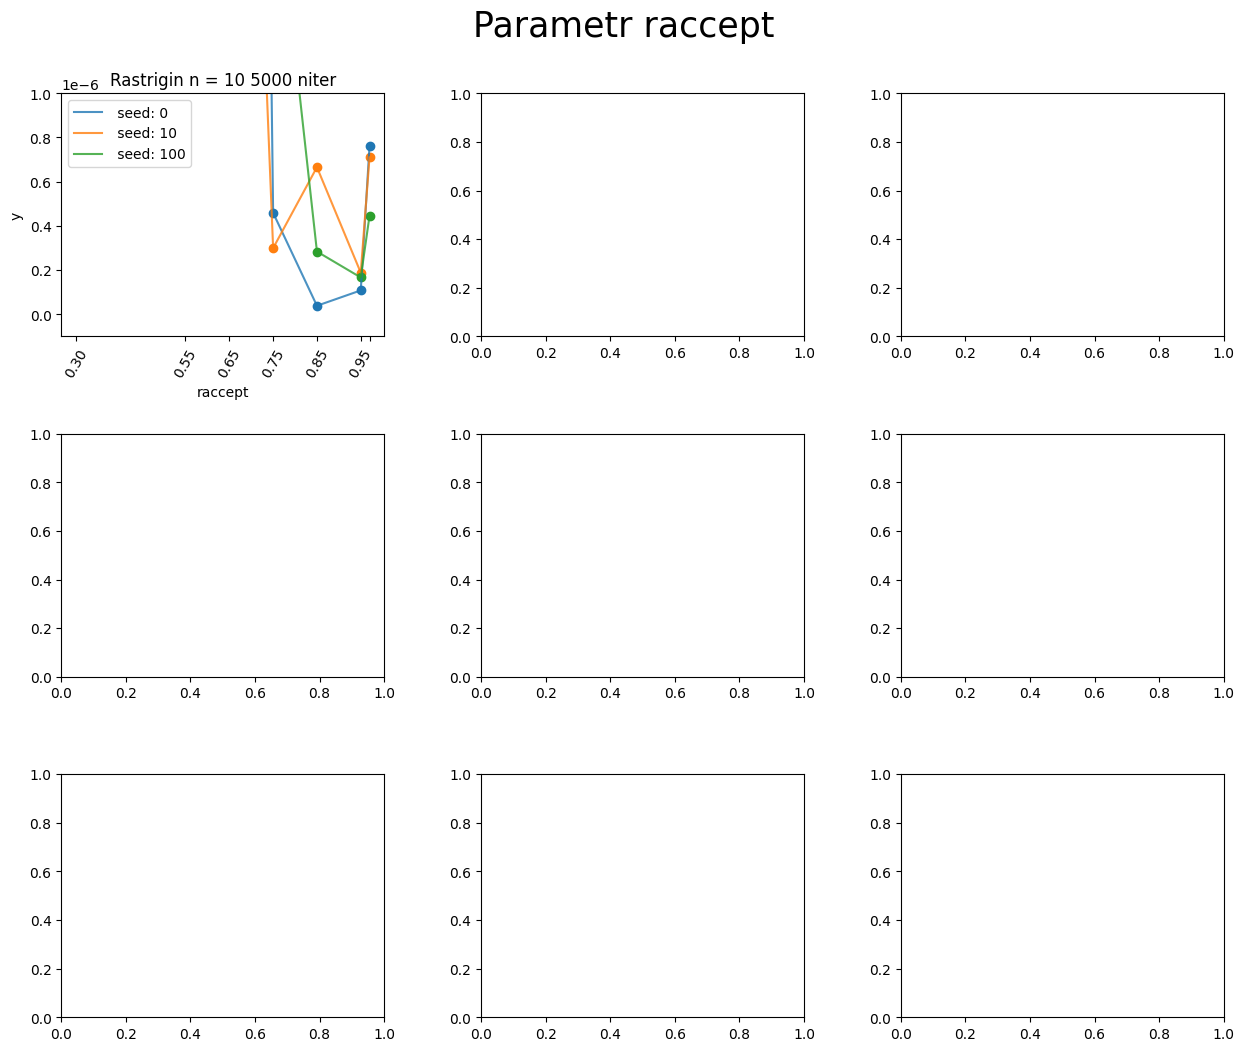

In [38]:
filename = "./CW 11-Harmony Search/report_HS_auto.txt"
filename = "B:\\prg\\Z24\\msio\\MSWIO_24Z\\cw11\\CW 11-Harmony Search\\results\\bonus\\report_HS_auto_rastrigin10_5k.txt"
#filename = "B:\\prg\\Z24\\msio\\MSWIO_24Z\\cw11\\CW 11-Harmony Search\\results\\rastrigin\\report_HS_auto_10.txt"
fname = 'rastrigin'
n = 10
df = load_file(filename, fname, n)

df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
dflt = df.head(1)
for param in ['raccept']:
    fig, axs = plot_1(df,param)
axs[0][0].set_ylim([-1e-7,1e-6])
axs[0][0].set_title(axs[0][0].get_title() + " 5000 niter")
fig.savefig("./plots/rastrigin_raccept_5kiter")

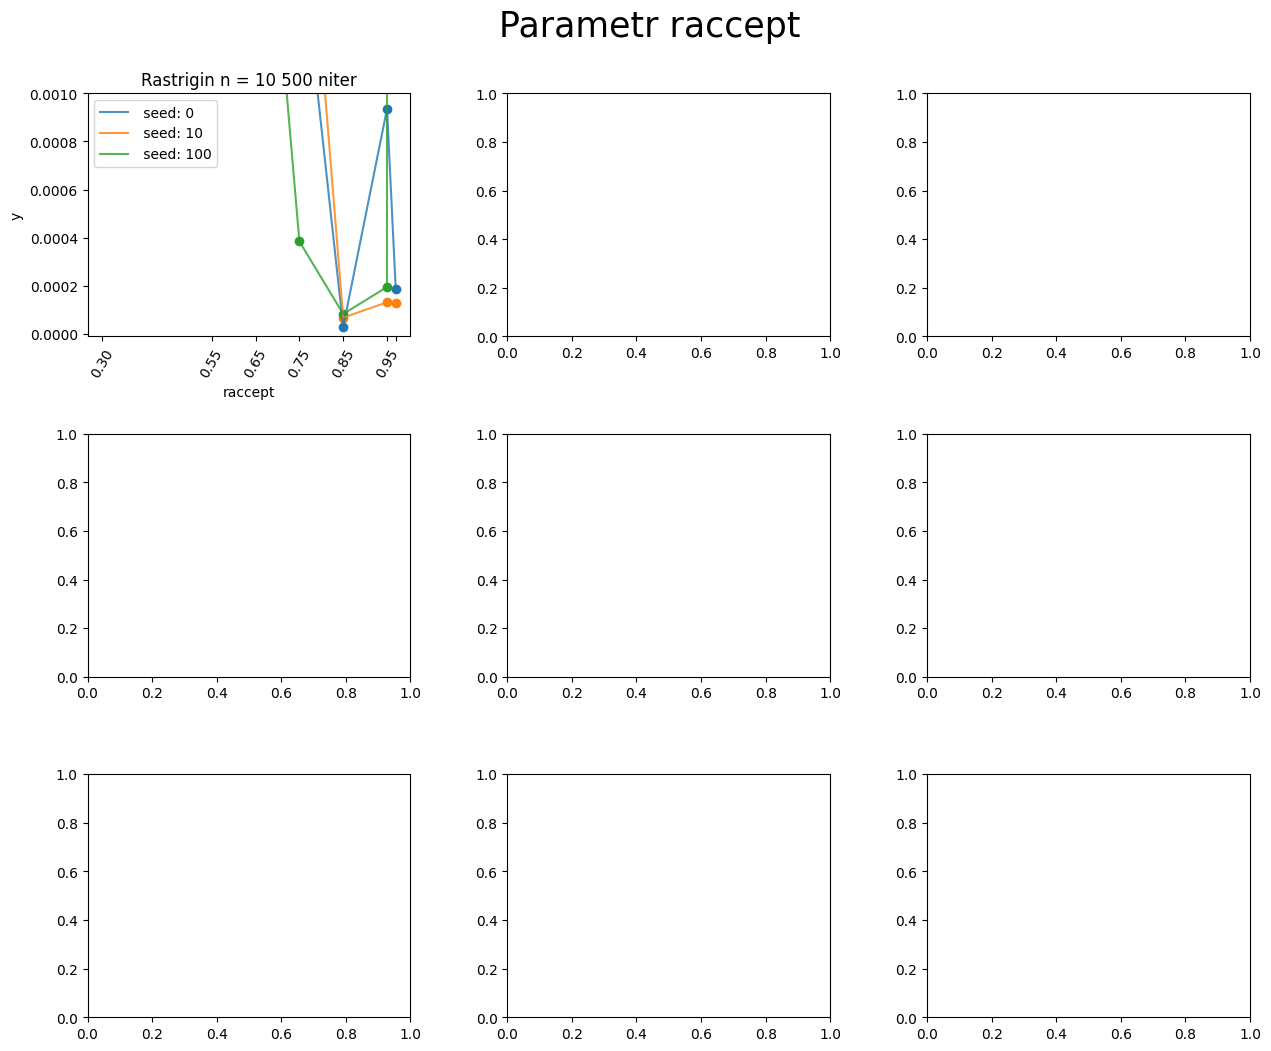

In [33]:
filename = "B:\\prg\\Z24\\msio\\MSWIO_24Z\\cw11\\CW 11-Harmony Search\\results\\rastrigin\\report_HS_auto_10.txt"
fname = 'rastrigin'
n = 10
df = load_file(filename, fname, n)

df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
dflt = df.head(1)
for param in ['raccept']:
    fig, axs = plot_1(df,param)
axs[0][0].set_ylim([-1e-5,1e-3])
axs[0][0].set_title(axs[0][0].get_title() + " 500 niter")
fig.savefig("./plots/rastrigin_raccept_500iter")

In [98]:
df = None
for fname in ['ackley','dejong','rastrigin']:
    for n in [1, 5, 10]:
        filename = f"./CW 11-Harmony Search/results/{fname}/report_HS_auto_{n}.txt"
        #filename = f"./CW 11-Harmony Search/results/backup/{fname}/report_HS_auto_{n}.txt"
        try:
            tdf = load_file(filename, fname, n)
        except Exception as e:
            print(e)
            continue
        if (type(df) == type(None)):
            df = tdf
        else:
            df = pd.concat([df, tdf])
df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
dflt = df.head(1)

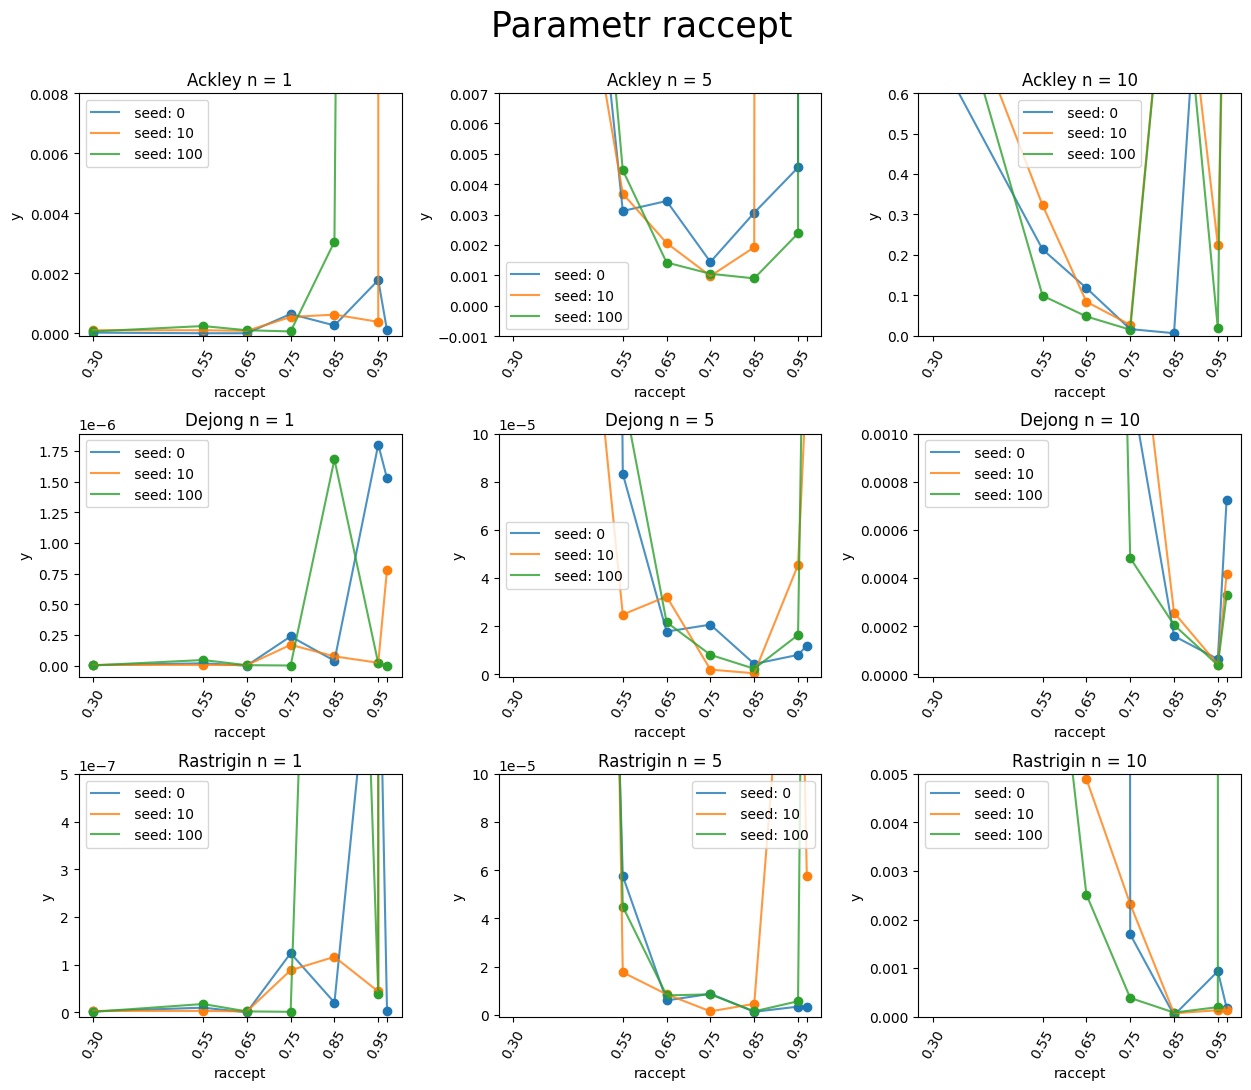

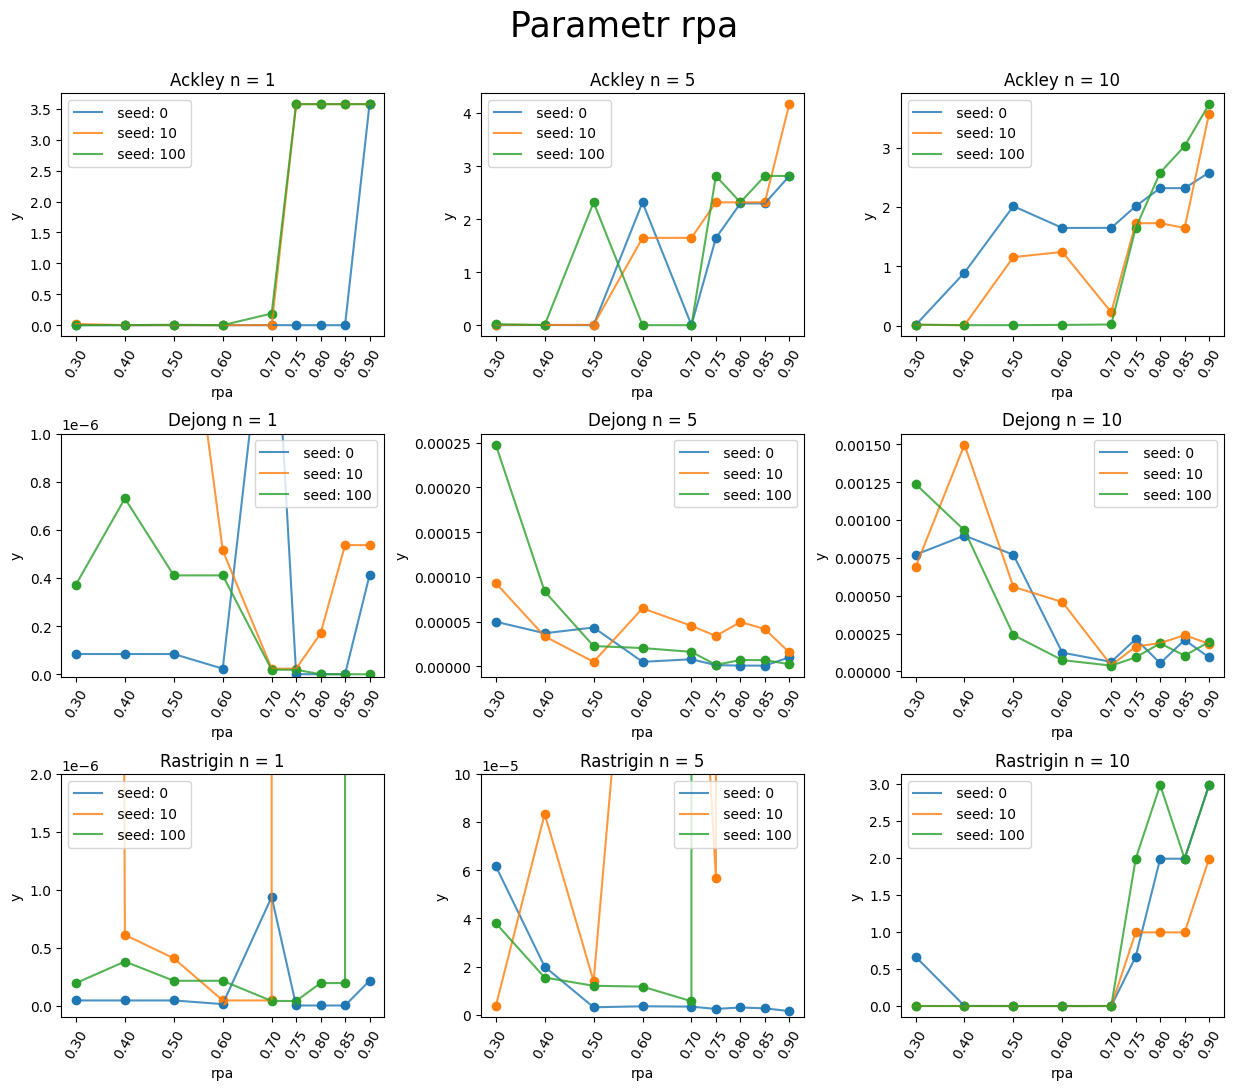

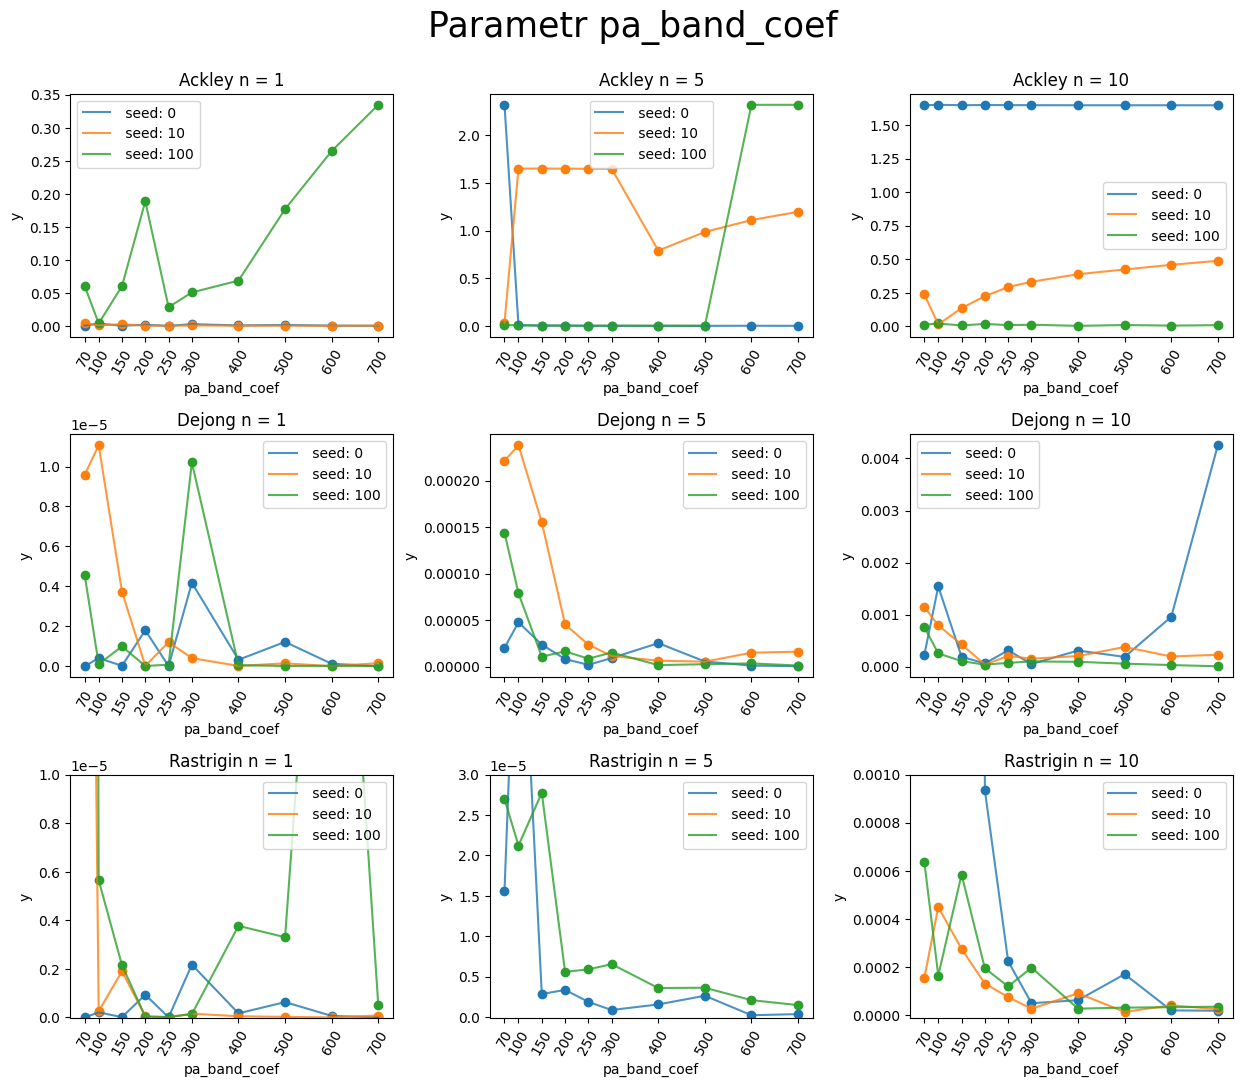

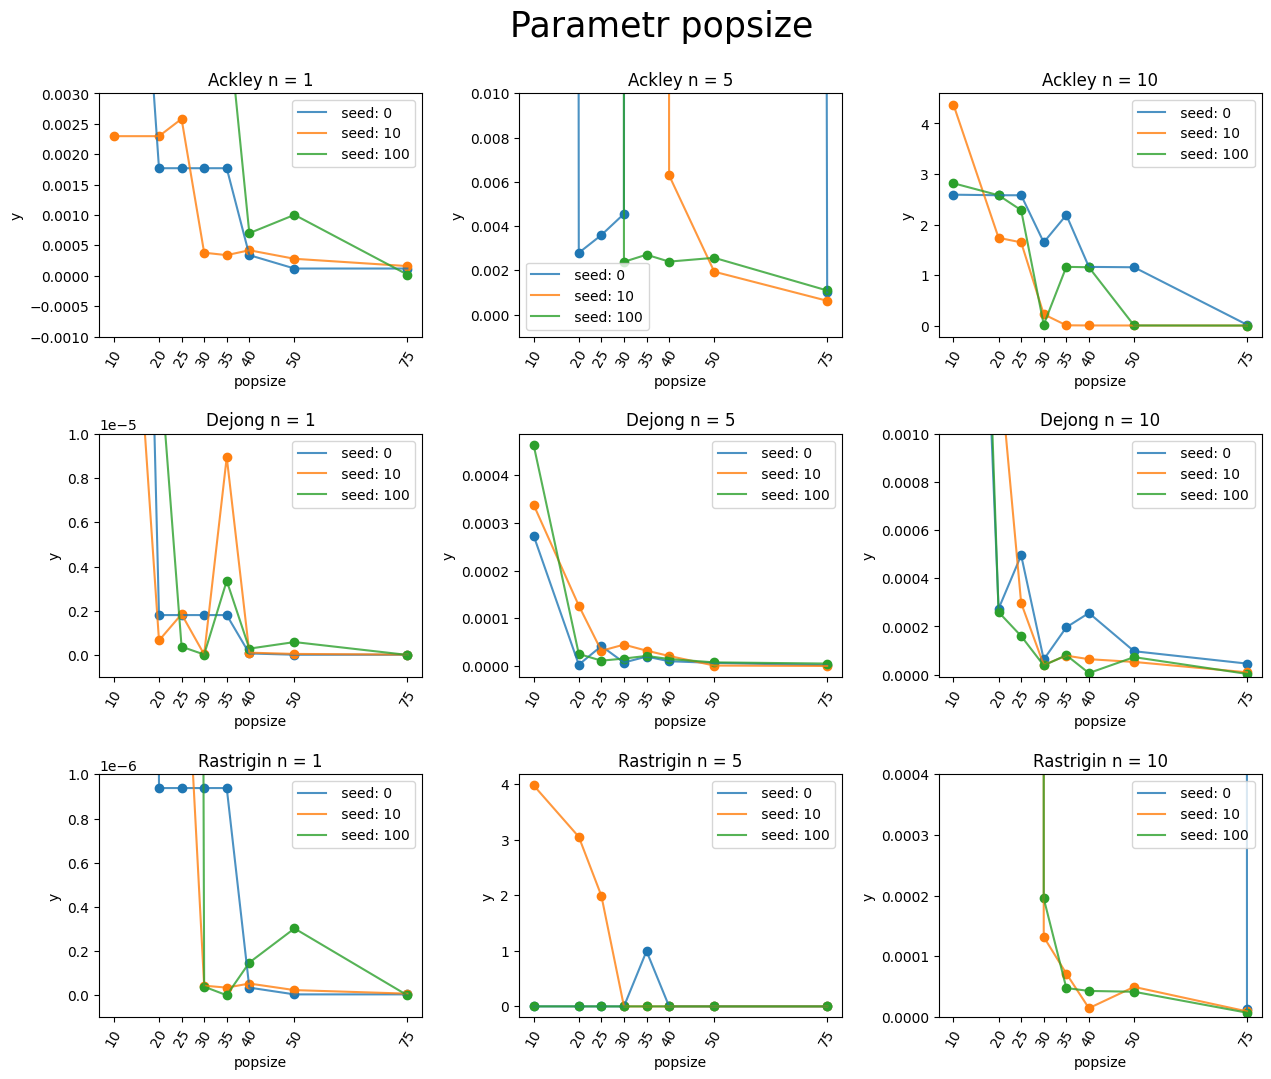

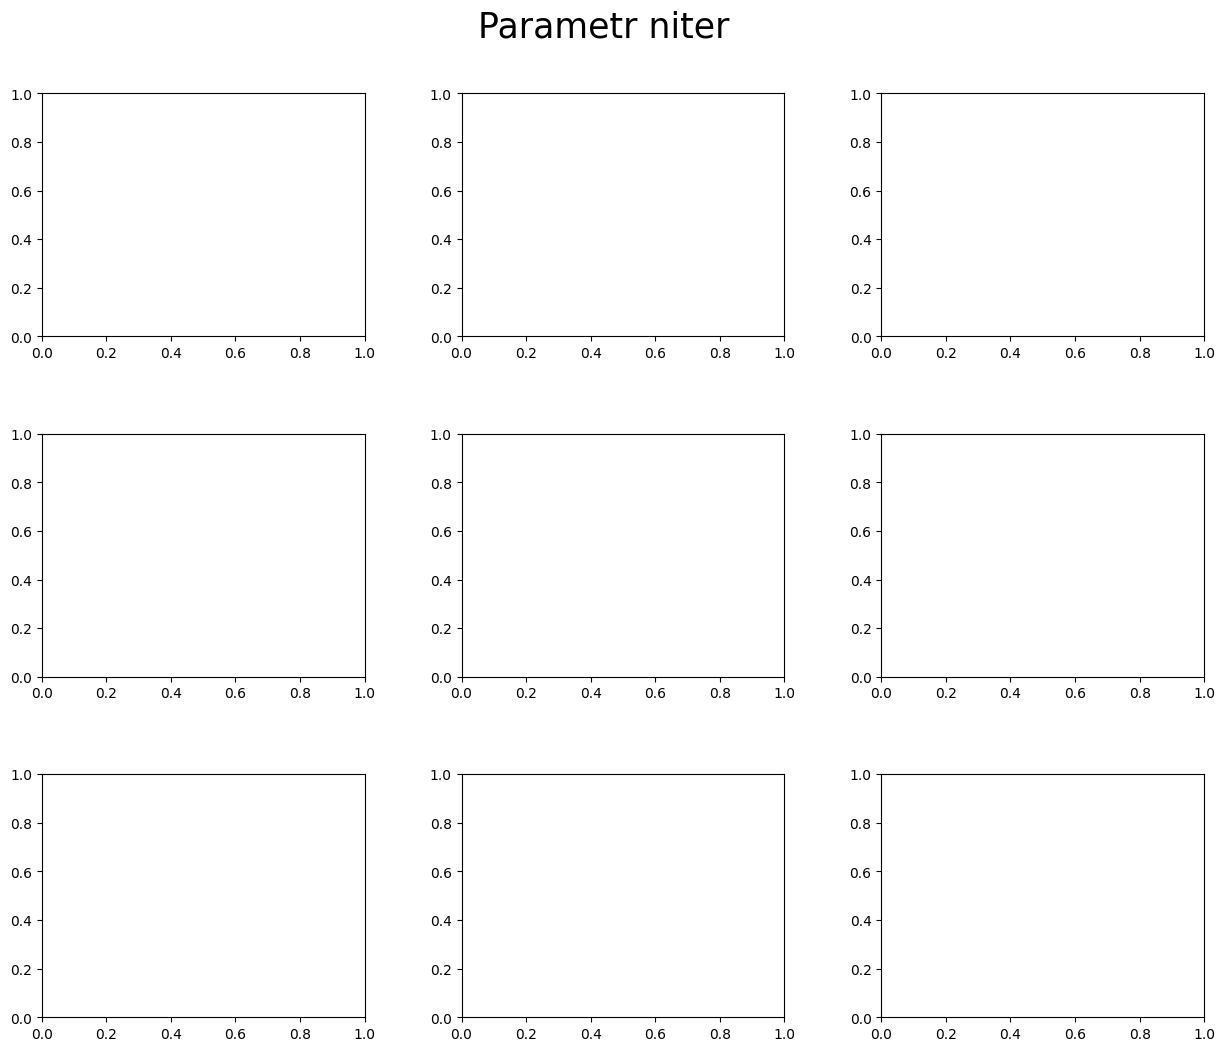

In [100]:
for param in PARAMS:
    plot_1(df,param)

C:\Users\Filip\AppData\Local\Temp\ipykernel_17844\2579043206.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17844\2579043206.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17844\2579043206.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17844\2579043206.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fonts

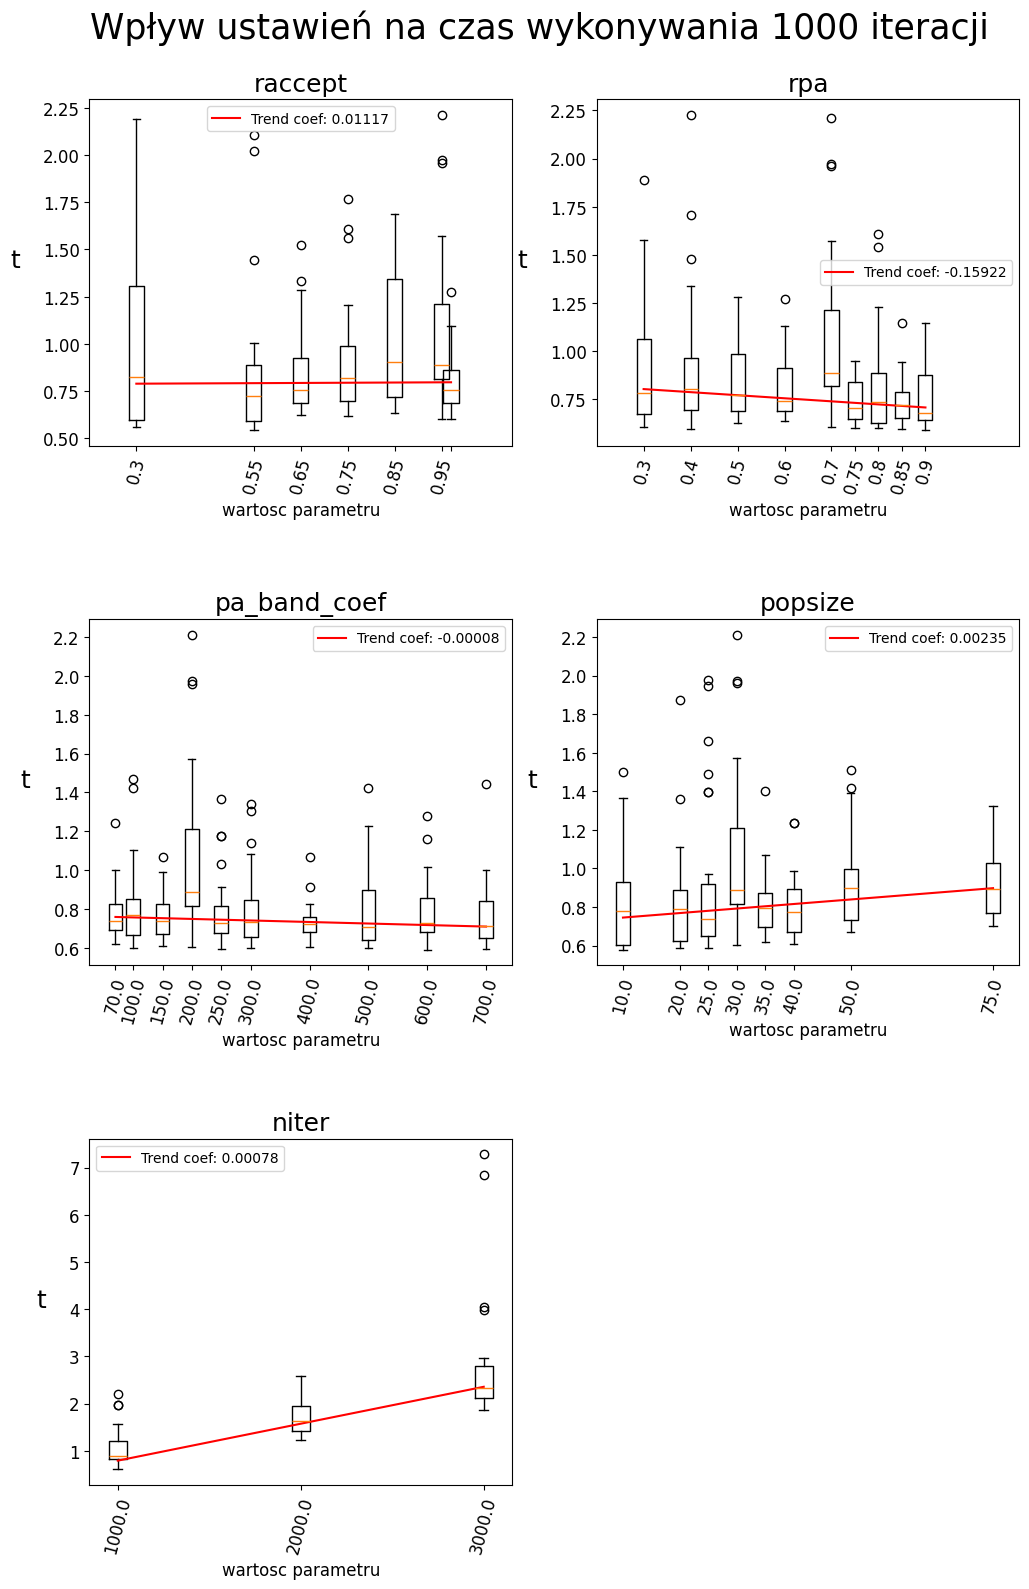

In [47]:
def plot_single(df,param,ax, y='t'):
    paramdf = df[df[param]!=dflt[param].values[0]].sort_values(by=param)
    dfltdf = df.loc[[0,1,2]]
    tdf = pd.concat([paramdf, dfltdf])
    w = max(np.unique(tdf[param]))/30
    for val in np.unique(tdf[param]):
        tdf2 = tdf[tdf[param] == val]
        ax.boxplot(tdf2[y], positions=[val], widths=[w])
    #ax.set_xlabel(param, fontsize=18)
    ax.set_title(f"{param}", fontdict={'fontsize':18})

    ax.set_xlabel("wartosc parametru", fontsize=12)
    ax.set_ylabel(y, labelpad=20, fontsize=18, rotation=0)
    if param in ['raccept']:
                    t = ax.get_xticklabels()
                    #t = t[t!=0.97]
                    #print(t)
                    [x.set_text('') if x.get_text() == '0.97' else x for x in t]
                    ax.set_xticklabels(t)
    match param:
        case 'raccept':
            ax.set_xlim([0.2,1.1])
        case 'rpa':
            ax.set_xlim([0.2,1.1])
    
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize=12)


y = 't'
fig, axs = plt.subplots(3,2, figsize=(12,18))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
i = -1
for param in PARAMS:
    i += 1
    axid1 = int(i/2)
    axid2 = i%2
    plot_single(df, param, axs[axid1, axid2],y)
    gb = df.groupby(by=param)
    gbdf = gb.median(numeric_only=True)[y]
    coef = np.polyfit(gbdf.index, gbdf.values, 1)
    trend = np.poly1d(coef)
    axs[axid1,axid2].plot(gbdf.index, trend(gbdf.index), color='red', label=f'Trend coef: {coef[0]:.5f}')
    axs[axid1,axid2].legend()
axs[2,1].remove()
fig.suptitle("Wpływ ustawień na czas wykonywania", fontsize=25, y=0.93)
fig.savefig('./plots/time.png', bbox_inches='tight')


it       9.980000e+02
ybest    5.229383e-09
sum               NaN
ycurr    1.568815e-07
Name: 998, dtype: float64


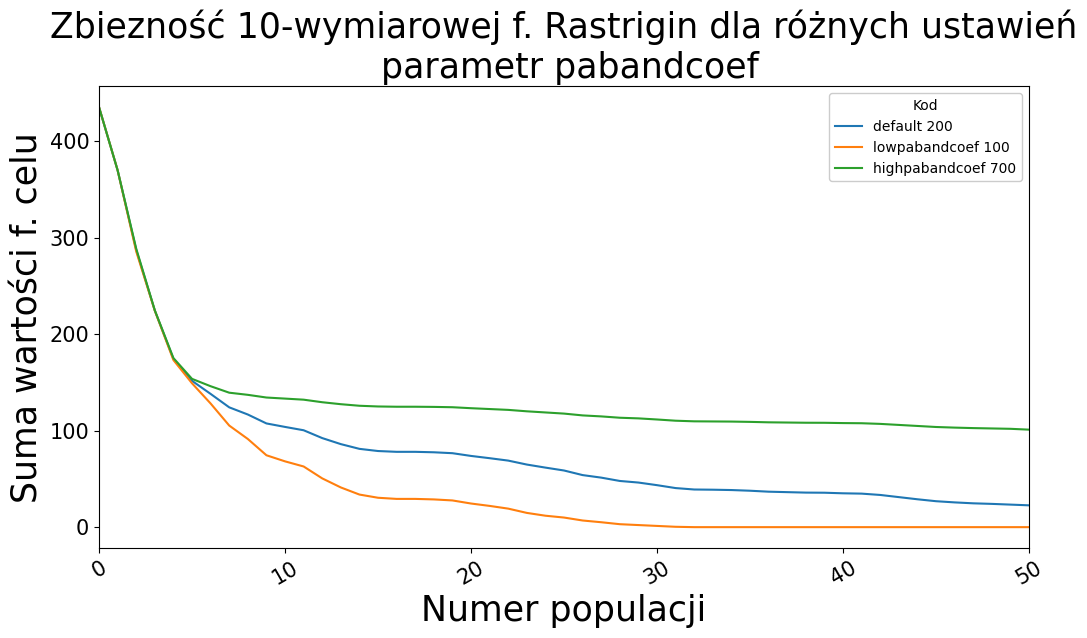

In [5]:
def init_df(n):
    columns = ['it','ybest','sum']
    return pd.DataFrame(columns=columns)
def proc_line(df, line, i=0):
    s = line.split(',')
    s.pop()
    #s = [float(x) for x in s]
    try:
        x = [s[0],s[1],s[2]]    
        return x
    except Exception as e:
        pass
def load_log(filename):
    with open(filename) as f:
        data = f.readlines()
        df = init_df(n)
        s = [proc_line(df,line, i) for i, line in enumerate(data)]
        
        df['it'] = [x[0] for x in s if x != None]
        df['ybest'] = [x[1] for x in s if x != None]
        df['ycurr'] = [x[2] for x in s if x != None]
        df.drop(df.tail(1).index,inplace=True)
        df = df.astype(float)
    return df

funcname = 'Rastrigin'
n=10
fig = plt.figure(figsize=(12,6))
step = 1

labels = ['default 0.95','lowraccept 0.35','midraccept 0.75', 'highraccept 0.97']
labels = ['default 0.7','lowrpa 0.3','midrpa 0.5', 'highrpa 0.9']
labels = ['default 200','lowpabandcoef 100', 'highpabandcoef 700']

lognames = [x.split(' ')[0] for x in labels]
param = labels[1].split(' ')[0].split('low')[1]
for logname,label in zip(lognames, labels):
    #plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ybest'],label='ybest')
    df = load_log(f'./CW 11-Harmony Search/results/logs/log_{logname}.txt')
    if logname in ['midrpa']:
        plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ycurr'],label=label, linestyle='--', zorder=99)
    else :
        plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ycurr'],label=label)
    plt.title(f'Zbiezność {n}-wymiarowej f. {funcname} dla różnych ustawień\n parametr {param}', fontsize = 25)
    plt.xlabel('Numer populacji', fontsize=25)
    plt.ylabel('Suma wartości f. celu', fontsize=25)
    plt.xticks(fontsize=15, rotation = 30)
    plt.yticks(fontsize=15)

plt.legend(title="Kod", framealpha=1)
print(df.loc[len(df)-1])


ax = plt.gca()
ax.set_xlim([0, 50])
if param == 'rpa':
    ax.set_xlim([0,100])

fig.savefig(f'./plots/{param}conv.png',bbox_inches='tight')

plt.show()

30
10
700
10
700
it       9.990000e+02
ybest    1.017210e-08
sum               NaN
ycurr    7.120471e-06
Name: 999, dtype: float64


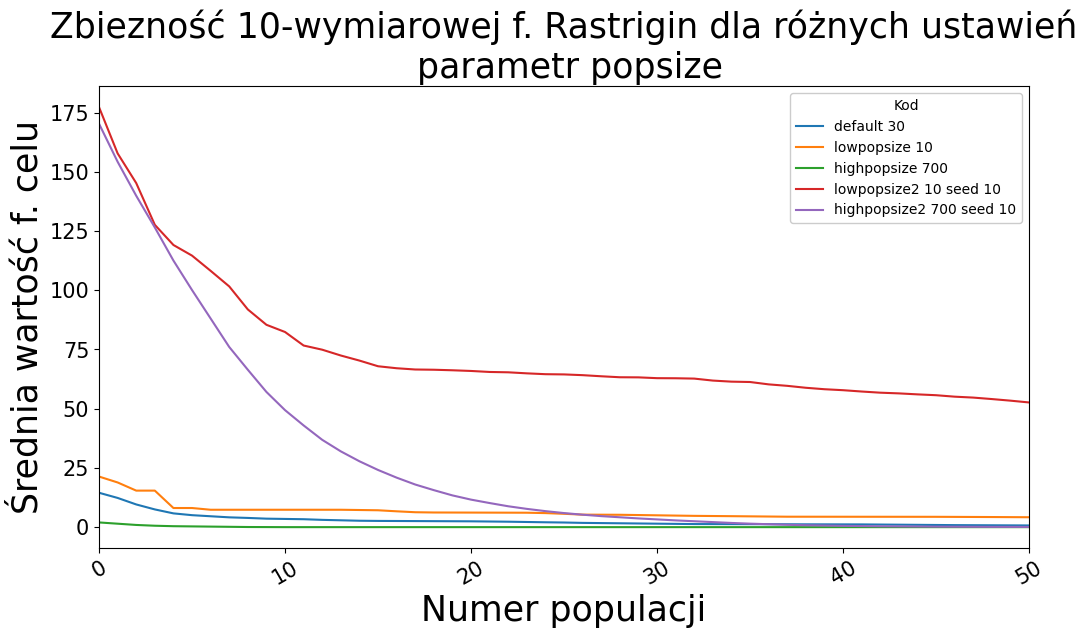

In [6]:
fig = plt.figure(figsize=(12,6))
step = 1

n = 10
labels = ['default 30','lowpopsize 10', 'highpopsize 700', 'lowpopsize2 10 seed 10', 'highpopsize2 700 seed 10']
lognames = [x.split(' ')[0] for x in labels]
param = labels[1].split(' ')[0].split('low')[1]
for logname,label in zip(lognames, labels):
    npop = int(label.split(' ')[1])
    print(npop)
    df = load_log(f'./CW 11-Harmony Search/results/logs/log_{logname}.txt')
    yval = df.iloc[::step]['ycurr'].values/npop
    plt.plot(df.iloc[::step]['it'], yval,label=label)
    plt.title(f'Zbiezność {n}-wymiarowej f. {funcname} dla różnych ustawień\n parametr {param}', fontsize = 25)
    plt.xlabel('Numer populacji', fontsize=25)
    plt.ylabel('Średnia wartość f. celu', fontsize=25)
    plt.xticks(fontsize=15, rotation = 30)
    plt.yticks(fontsize=15)

plt.legend(title="Kod", framealpha=1)
print(df.loc[len(df)-1])

ax = plt.gca()
ax.set_xlim([0, 50])

fig.savefig(f'./plots/{param}conv.png',bbox_inches='tight')
plt.show()

30
10
700
10
700
it       9.990000e+02
ybest    1.017210e-08
sum               NaN
ycurr    7.120471e-06
Name: 999, dtype: float64


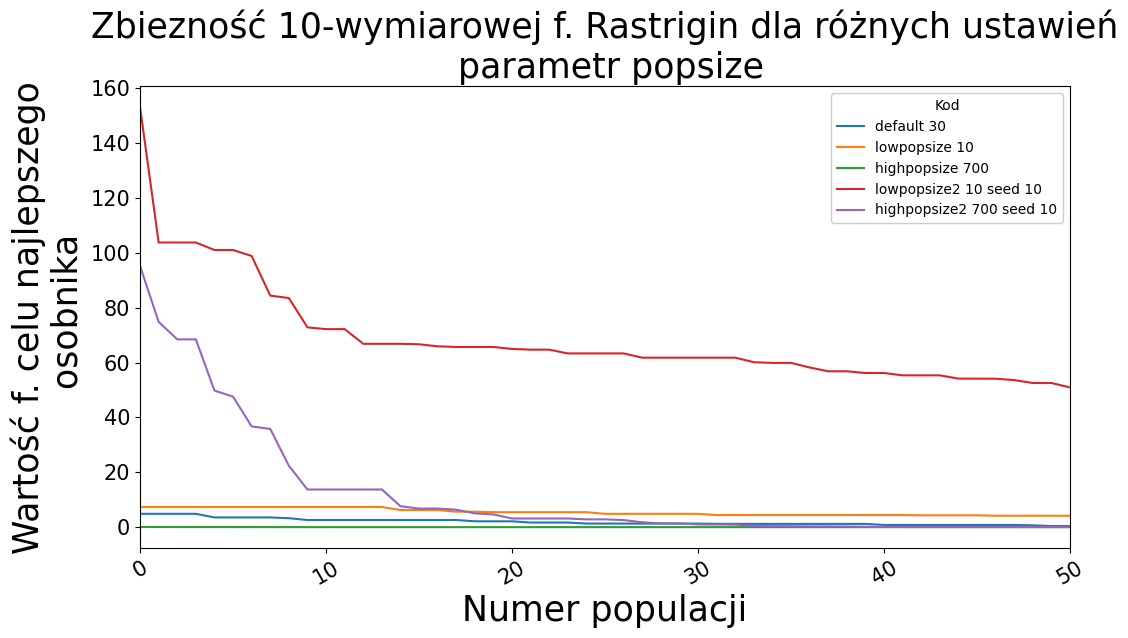

In [7]:
fig = plt.figure(figsize=(12,6))
step = 1

n = 10
labels = ['default 30','lowpopsize 10', 'highpopsize 700', 'lowpopsize2 10 seed 10', 'highpopsize2 700 seed 10']
lognames = [x.split(' ')[0] for x in labels]
param = labels[1].split(' ')[0].split('low')[1]
for logname,label in zip(lognames, labels):
    npop = int(label.split(' ')[1])
    print(npop)
    df = load_log(f'./CW 11-Harmony Search/results/logs/log_{logname}.txt')
    yval = df.iloc[::step]['ybest'].values
    plt.plot(df.iloc[::step]['it'], yval,label=label)
    plt.title(f'Zbiezność {n}-wymiarowej f. {funcname} dla różnych ustawień\n parametr {param}', fontsize = 25)
    plt.xlabel('Numer populacji', fontsize=25)
    plt.ylabel('Wartość f. celu najlepszego\n osobnika', fontsize=25)
    plt.xticks(fontsize=15, rotation = 30)
    plt.yticks(fontsize=15)

plt.legend(title="Kod", framealpha=1)
print(df.loc[len(df)-1])

ax = plt.gca()
ax.set_xlim([0, 50])

fig.savefig(f'./plots/{param}ybestconv.png',bbox_inches='tight')
plt.show()

In [60]:

df = None
fname = 'rastrigin'
n = 10
filename = f"./CW 11-Harmony Search/results/grid/report_HS_auto.txt"
df = load_file(filename, fname, n)
df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
dflt = df.head(1)


C:\Users\Filip\AppData\Local\Temp\ipykernel_17844\574496422.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_17844\574496422.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


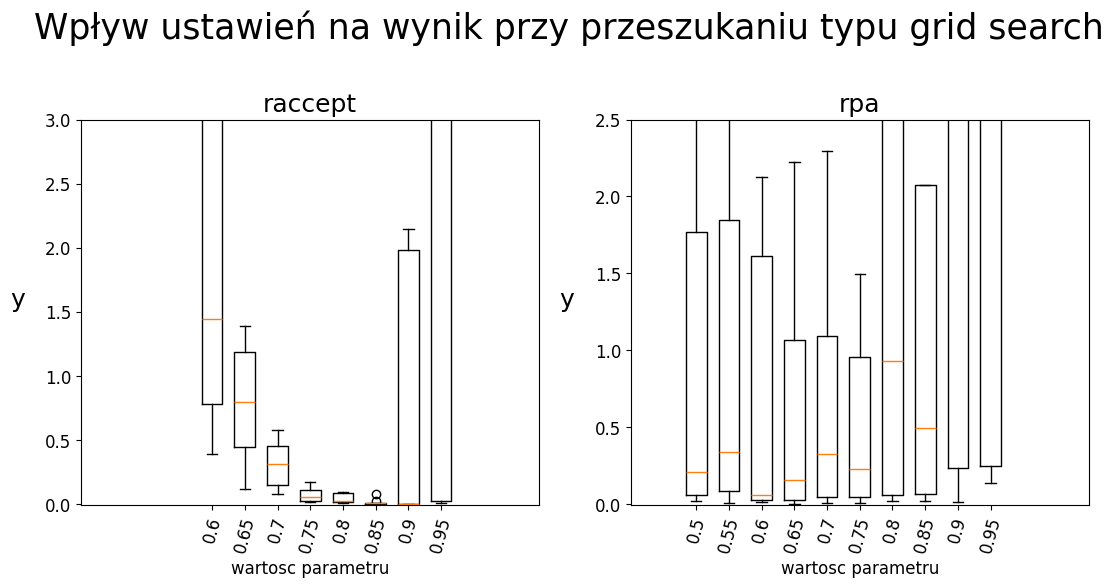

In [75]:
def plot_single(df,param,ax, y='t'):
    paramdf = df[df[param]!=dflt[param].values[0]].sort_values(by=param)
    #dfltdf = df.loc[[0]] #only one default
    #tdf = pd.concat([paramdf])
    tdf = df.sort_values(by=param)
    w = max(np.unique(tdf[param]))/30
    for val in np.unique(tdf[param]):
        tdf2 = tdf[tdf[param] == val]
        ax.boxplot(tdf2[y], positions=[val], widths=[w])
    #ax.set_xlabel(param, fontsize=18)
    ax.set_title(f"{param}", fontdict={'fontsize':18})

    ax.set_xlabel("wartosc parametru", fontsize=12)
    ax.set_ylabel(y, labelpad=20, fontsize=18, rotation=0)

    ax.set_xlim([0.4, 1.1])

    
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize=12)


y = 'y'
fig, axs = plt.subplots(1,2, figsize=(13,5))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
i = -1
for param in ['raccept','rpa']:
    i += 1
    plot_single(df, param, axs[i],y)
    #gb = df.groupby(by=param)
    #gbdf = gb.median(numeric_only=True)[y]
    #coef = np.polyfit(gbdf.index, gbdf.values, 1)
    #trend = np.poly1d(coef)
    #axs[i].plot(gbdf.index, trend(gbdf.index), color='red', label=f'Trend coef: {coef[0]:.5f}', alpha=0.5)
    #axs[i].legend(loc='upper right')
axs[0].set_ylim([-1e-5, 3e-2])
axs[1].set_ylim([-1e-5, 1e-2])


fig.suptitle("Wpływ ustawień na wynik przy przeszukaniu typu grid search", fontsize=25, y=1.1)
fig.savefig('./plots/grid.png', bbox_inches='tight')


In [99]:
#zaklada ze df to wyniki pojedynczych przeszukan wczytanych duzo wczesniej
df = df[df['niter']==500] #only 500 iter
pd.set_option('display.max_columns', None)
gb = df.groupby(by='g')
gbdf = gb.min(numeric_only=True)
for g, val in zip(gbdf.index, gbdf['y'].values):
    print(g,val, df[(df['g']==g) & (df['y']==val)].shape[0])
    display(df[(df['g']==g) & (df['y']==val)].head(1))

ackley1 1.465494e-14 2


,fname,n,t_opt,t,eval_opt,eval,raccept,rpa,pa_band_coef,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
6,ackley,1,0.113,0.372,5100.0,15030.0,0.55,0.7,200.0,30.0,500.0,0.0,1.465494e-14,-3.596109e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ackley1


ackley10 0.001820866 1


,fname,n,t_opt,t,eval_opt,eval,raccept,rpa,pa_band_coef,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
92,ackley,10,0.439,0.44,37500.0,37575.0,0.95,0.7,200.0,75.0,500.0,100.0,0.001821,0.000045,0.00017,-0.000315,-0.00028,0.00002,-0.000425,-0.001025,-0.000215,-0.000405,0.00063,ackley10


ackley5 0.0006212985 1


,fname,n,t_opt,t,eval_opt,eval,raccept,rpa,pa_band_coef,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
91,ackley,5,0.382,0.407,35250.0,37575.0,0.95,0.7,200.0,75.0,500.0,10.0,0.000621,0.000005,0.000235,-0.000095,-0.000025,0.000235,NaN,NaN,NaN,NaN,NaN,ackley5


dejong1 1.232595e-32 3


,fname,n,t_opt,t,eval_opt,eval,raccept,rpa,pa_band_coef,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
35,dejong,1,0.227,0.343,9840.0,15030.0,0.95,0.8,200.0,30.0,500.0,100.0,1.232595e-32,1.110223e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dejong1


dejong10 3.077976e-06 1


,fname,n,t_opt,t,eval_opt,eval,raccept,rpa,pa_band_coef,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
92,dejong,10,0.332,0.344,36225.0,37575.0,0.95,0.7,200.0,75.0,500.0,100.0,0.000003,0.000748,-0.000565,0.000015,-0.000809,-0.000168,0.001083,0.000031,0.000397,0.000168,0.000397,dejong10


dejong5 2.906474e-07 1


,fname,n,t_opt,t,eval_opt,eval,raccept,rpa,pa_band_coef,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
69,dejong,5,0.318,0.373,12930.0,15030.0,0.95,0.7,700.0,30.0,500.0,0.0,2.906474e-07,-0.000061,0.000096,0.000432,-0.000031,0.000301,NaN,NaN,NaN,NaN,NaN,dejong5


rastrigin1 0.0 1


,fname,n,t_opt,t,eval_opt,eval,raccept,rpa,pa_band_coef,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
15,rastrigin,1,0.318,0.492,7860.0,15030.0,0.65,0.7,200.0,30.0,500.0,0.0,0.0,-6.707670e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rastrigin1


rastrigin10 6.890985e-06 1


,fname,n,t_opt,t,eval_opt,eval,raccept,rpa,pa_band_coef,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
92,rastrigin,10,0.884,0.898,36450.0,37575.0,0.95,0.7,200.0,75.0,500.0,100.0,0.000007,-0.000009,7.256701e-16,-0.000023,-0.0001,0.000082,-0.000088,0.00005,-0.00002,-0.000081,0.00001,rastrigin10


rastrigin5 2.118647e-07 1


,fname,n,t_opt,t,eval_opt,eval,raccept,rpa,pa_band_coef,popsize,niter,seed,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
66,rastrigin,5,0.254,0.364,10470.0,15030.0,0.95,0.7,600.0,30.0,500.0,0.0,2.118647e-07,0.000004,-0.000001,0.000005,-0.000028,0.000016,NaN,NaN,NaN,NaN,NaN,rastrigin5
